# Reading in data and making x and y variables

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statistics import stdev

df = pd.read_csv("mnist-1.csv", low_memory=False, header=None)
y = df[0]
x = df.drop(columns=[0])


# Performing PCA now

## Subtracting Mean

In [13]:
# here we iterate across all columns, find their mean and then subtract that value from all entries in that column
for column_iter in range(x.shape[1]):
    current_mean = np.mean(x[column_iter+1].to_numpy()) # +1 because index is shifted right
    if current_mean != 0:
        # if not already zero
        x[column_iter+1] = x[column_iter+1] - current_mean

#### There is no need to standardize the data because they are pixels and are
on the same scale

## Calculating covariance matrix

In [14]:
# as given in the lectures C = 1/n * X*X^T 
# first I need the transposed x matrix
trans_x = x.to_numpy().T
n, m = x.shape
Covariance_matrix = np.dot( trans_x, x.to_numpy()) / n


In [7]:
Covariance_matrix = np.cov(x, rowvar=False)

## Calculating eigen vectors and Eigenvalues

In [19]:
# im assuming I can use an eigenvalue finding function from numpy
eigen_values, eigen_vectors = np.linalg.eigh(Covariance_matrix)

## Ranking eigenvector by corresponding values


In [20]:
sorted_indexs = eigen_values.argsort()[::-1] # sorting in reverse order
eigen_values = eigen_values[sorted_indexs] # this ensures that the eigenvalues are made into the correct order
eigen_vectors = eigen_vectors[sorted_indexs]

principal_components = eigen_vectors[:,:10] # getting the top 10 dimensions of eigenvectors as required

In [21]:
X_pca = np.dot(x.to_numpy(), principal_components)

In [22]:
X_pca[0:5:1]

array([[ 0.01400529,  0.00886169,  0.00158672, -0.00290409,  0.00350262,
        -0.00371802, -0.00439566, -0.00087472,  0.00646334, -0.00156487],
       [ 0.01400529,  0.00886169,  0.00158672, -0.00290409,  0.00350262,
        -0.00371802, -0.00439566, -0.00087472,  0.00646334, -0.00156487],
       [ 0.01400529,  0.00886169,  0.00158672, -0.00290409,  0.00350262,
        -0.00371802, -0.00439566, -0.00087472,  0.00646334, -0.00156487],
       [ 0.01400529,  0.00886169,  0.00158672, -0.00290409,  0.00350262,
        -0.00371802, -0.00439566, -0.00087472,  0.00646334, -0.00156487],
       [ 0.01400529,  0.00886169, -0.03749282, -0.00290409,  0.00350262,
        -0.00371802, -0.00439566, -0.00087472,  0.00646334, -0.00156487]])

# Kmeans

## first we need to define our functions

In [80]:
# our distance function is the euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def E_step(X, prototypes):
    # here we fix the points to a cluster (assign to the nearest prototype)
    clusters = []
    for point in X:
        # Compute distance from point to each centroid
        distances = [euclidean_distance(point, prototype) for prototype in prototypes]
        # Assign point to the nearest centroid
        closest_centroid = np.argmin(distances)
        clusters.append(closest_centroid)
    return np.array(clusters)

def M_step(X, clusters, number_of_clusters ):
    prototypes = [] # creating new prototypes

    for i in range(number_of_clusters):

        # get all points assigned to that cluster
        samples = X[clusters == i]

        if (len(samples) > 0): # if there is more than one value in the cluster
            prototype = np.mean(samples, axis=0)
        else: # if no points we randomly initialise 
            prototype = X[np.random.choice(X.shape[0])]
        prototypes.append(prototype) # adding prototype to the list
    return np.array(prototypes)

def get_loss(X, prototypes, clusters):
    # this finds the euclidean distance for each prototype, adds it to a total counter and returns it
    loss = 0
    for i, point in enumerate(X):
        prototype = prototypes[clusters[i]]
        loss += np.sum((point - prototype) ** 2)
    return loss

def random_initialisation(X, number_of_clusters):
    # randomly selecting a number of points from the dataset to be the prototypes
    prototypes = X[np.random.choice(X.shape[0], number_of_clusters, replace=False)]
    return prototypes

def kmeans_implementation(X, number_of_clusters, iterations=100):
    prototypes = random_initialisation(X, number_of_clusters)
    loss_list = list()

    for iteration in range(iterations):
        clusters = E_step(X, prototypes)

        new_prototypes = M_step(X, clusters, number_of_clusters)
        loss_list.append( get_loss(X, new_prototypes, clusters) )
        
        if np.all(np.abs(new_prototypes - prototypes) < 1e-4):
            break
        
        prototypes = new_prototypes
    
    plt.plot(loss_list)
    plt.xlabel('Iteration')
    plt.ylabel('Loss (Cost J)')
    plt.title('KMeans Loss Function Over Iterations')
    plt.show()
    return loss_list[-1] # returning the final loss

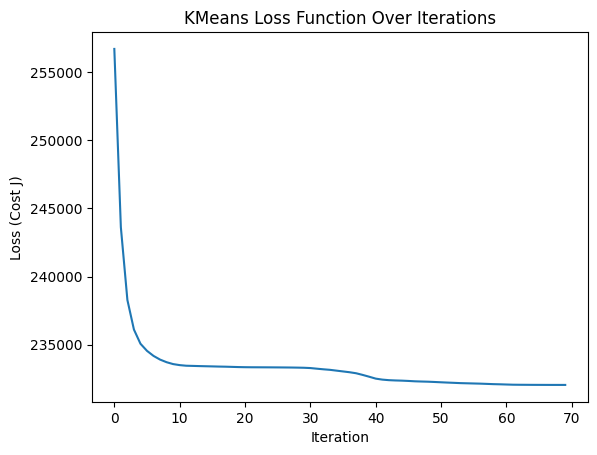

In [79]:
kmeans_implementation(x.to_numpy(), 10)


# Finding the best K in K means

In [127]:
# our distance function is the euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def E_step(X, prototypes):
    # here we fix the points to a cluster (assign to the nearest prototype)
    clusters = []
    for point in X:
        # Compute distance from point to each centroid
        distances = [euclidean_distance(point, prototype) for prototype in prototypes]
        # Assign point to the nearest centroid
        closest_centroid = np.argmin(distances)
        clusters.append(closest_centroid)
    return np.array(clusters)

def M_step(X, clusters, number_of_clusters ):
    prototypes = [] # creating new prototypes

    for i in range(number_of_clusters):

        # get all points assigned to that cluster
        samples = X[clusters == i]

        if (len(samples) > 0): # if there is more than one value in the cluster
            prototype = np.mean(samples, axis=0)
        else: # if no points we randomly initialise 
            prototype = X[np.random.choice(X.shape[0])]
        prototypes.append(prototype) # adding prototype to the list
    return np.array(prototypes)

def get_loss(X, prototypes, clusters):
    # this finds the euclidean distance for each prototype, adds it to a total counter and returns it
    loss = 0
    for i, point in enumerate(X):
        prototype = prototypes[clusters[i]]
        loss += np.sum((point - prototype) ** 2)
    return loss

def random_initialisation(X, number_of_clusters):
    # randomly selecting a number of points from the dataset to be the prototypes
    prototypes = X[np.random.choice(X.shape[0], number_of_clusters, replace=False)]
    return prototypes

def kmeans_implementation(X, number_of_clusters, iterations=100):
    prototypes = random_initialisation(X, number_of_clusters)
    loss_list = list()

    for iteration in range(iterations):
        clusters = E_step(X, prototypes)

        new_prototypes = M_step(X, clusters, number_of_clusters)
        loss_list.append( get_loss(X, new_prototypes, clusters) )
        
        if np.all(np.abs(new_prototypes - prototypes) < 1e-4):
            break
        
        prototypes = new_prototypes
    
    return prototypes, clusters, loss_list[-1] # returning the final loss

In [128]:
training_set_x = x.to_numpy()[0:3999:1]
validation_set_x = x.to_numpy()[4000:5999:1]


In [133]:

best_k_loss = float('inf')
best_k_value = 0
losses = list()
for k in range(2,100, 2):

    prototypes, clusters, training_loss = kmeans_implementation(training_set_x, k)
    validation_clusters = E_step(validation_set_x, prototypes)
    validation_loss = get_loss(validation_set_x, prototypes, validation_clusters)
    losses.append(validation_loss)
    if(validation_loss < best_k_loss):
        best_k_loss = validation_loss
        best_k_value = k
    

In [135]:
print("Best K: {} with best loss of: {}".format(best_k_value, best_k_loss))

Best K: 94 with best loss of: 59008.72234457686


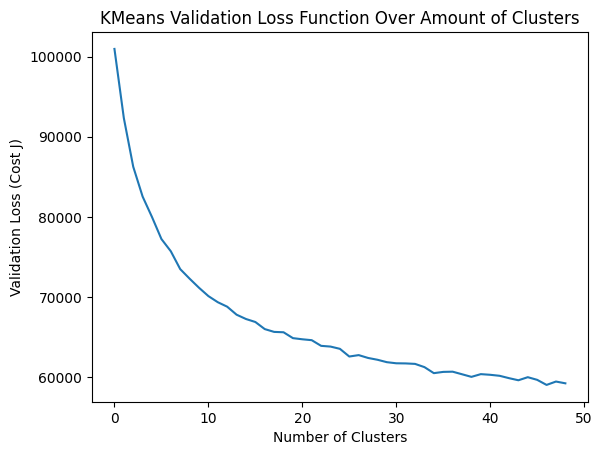

In [134]:
plt.plot(losses)
plt.xlabel('Number of Clusters')
plt.ylabel('Validation Loss (Cost J)')
plt.title('KMeans Validation Loss Function Over Amount of Clusters')
plt.show()

# implementing the Kernel K means algorithm with RBF kernel

In [125]:
import numpy as np
from math import pow

def distances_between_samples(samples):
    n, m = samples.shape
    distance_matrix = np.zeros((n, n))  # creating a n x n distance matrix between pairs
    # now calculating the distance between samples
    for i in range(n):
        for j in range(n):
            distance_matrix[i][j] = np.sum((samples[i] - samples[j]) ** 2) 
    return distance_matrix

def rbf_kernel_function(samples, sigma):
    distances = distances_between_samples(samples)
    return np.exp(-distances / (2 * pow(sigma, 2)))

def random_initialisation(samples, number_of_clusters):
    # randomly selecting a number of points from the dataset to be the prototypes
    prototype_indices = np.random.choice(samples.shape[0], number_of_clusters, replace=False)
    prototypes = samples[prototype_indices]
    return prototypes, prototype_indices

def e_step(samples, number_of_clusters, prototype_indices, kernel_matrix):
    n, m = samples.shape
    clusters = np.zeros(n, dtype=int)
    for i in range(n):
        distances_to_prototypes = np.zeros(number_of_clusters)
        for k in range(number_of_clusters):
            dist = kernel_matrix[i][prototype_indices[k]]  # kernel value between ith sample and kth prototype
            distances_to_prototypes[k] = -2 * dist + kernel_matrix[prototype_indices[k], prototype_indices[k]]
        clusters[i] = np.argmin(distances_to_prototypes)  # choosing closest prototype
    return clusters

def m_step(samples, kernel_matrix, cluster_assignments, number_of_clusters):
    clusters = [np.where(cluster_assignments == k)[0] for k in range(number_of_clusters)]
    n, m = samples.shape

    new_clusters = np.zeros(n, dtype=int)

    # iterating over all samples and finding their distances to the clusters
    for i in range(n):
        distances = np.zeros(number_of_clusters)

        for k in range(number_of_clusters):
            if len(clusters[k]) >= 1:
                # now we compute the kernel distance given the kernel trick
                first_term = kernel_matrix[i][i]  # distance of ith sample to itself
                second_term = np.sum(kernel_matrix[i][clusters[k]]) / len(clusters[k])
                third_term = np.sum(kernel_matrix[clusters[k], :][:, clusters[k]]) / (len(clusters[k]) ** 2)

                distances[k] = first_term - 2 * second_term + third_term
            else:
                distances[k] = float('inf')
        
        new_clusters[i] = np.argmin(distances)  # choosing closest cluster based on the kernel distance
    return new_clusters

def rbf_kmeans(samples, number_of_clusters):
    n, m = samples.shape
    distances = distances_between_samples(samples)
    
    # Finding sigma as stipulated
    sigma_squared = np.sum(distances) / (n ** 2)
    sigma = np.sqrt(sigma_squared / 2)  # Take square root of (1/2 * variance)

    # Finding the kernel matrix using the given kernel
    kernel_matrix = rbf_kernel_function(samples, sigma)

    prototypes, prototype_idxs = random_initialisation(samples, number_of_clusters)
    cluster_assignments = e_step(samples, number_of_clusters, prototype_idxs, kernel_matrix)


    for iteration in range(100):  # iterating for 100 epochs
        new_clusters = m_step(samples, kernel_matrix, cluster_assignments, number_of_clusters)
        # checking for convergence
        if np.all(cluster_assignments == new_clusters): 
            break
        else:
            cluster_assignments = new_clusters
    
    return cluster_assignments, prototypes

samples_to_use = x.to_numpy()[0:500:1]
cluster_assignments, prototypes = rbf_kmeans(samples_to_use, number_of_clusters=5)
